<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../B/B.html"><img src="../data/B_nav.png" width="100"  style="float:right;" alt="B"></a>
<h1>Annotation Visualization</h1> 
</div>

<br/>

<p>
In this notebook, we introduce some <code>LibFMP</code>-functions that can be used for visualizing various kinds of annotations as encountered in music processing. In particular, we consider <strong>single-value annotations</strong> and <strong>segment annotations</strong> that consist of pairs of values.
</p> 

## Conventions and Formats

In the FMP notebooks, we encounter various types of annotations that can be expressed as list of **instances**. Typically, an instance consists of one or several **numerical values** (e.g., time positions, durations, frequency values, pitches, and so on) and a **label** given as text string. In this notebook, we consider **single-value annotations** (one numerical value and a label) and **segment annotations** (two numerical values and a label). For more complex examples, we refer to [FMP notebook on symbolic music formats](../C1/C1S2_CSV.html). To write and read annotations, we use a simple file format based on on **comma-separated values** (CSV). Each instance corresponds to a **row**, and the elements (i.e., numerical values and label) of each row are separated by a **semicolon** (`;`) rather than a comma. Furthermore, in the first row, we include a header line that specifies the meaning of the columns (i.e., the elements).

To read, write, and modify CSV files, we often use the Python library [`pandas`](https://pandas.pydata.org/), which provides easy-to-use data structures and data analysis tools. Using the pandas framework, the content of a CSV file is stored in a two-dimensional tabular data structure with labeled axes (rows and columns) called `DataFrame`. This data structure can be accessed using attributes, see the [documentation for `pandas.DataFrame`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). For more details, we refer to the [FMP notebook on the CSV format](../C1/C1S2_CSV.html) and the functions `LibFMP.B.read_csv` and `LibFMP.B.write_csv`. In the following, we look at some simple examples that illustrate our conventions. 

## Single-Value Annotations

We start with an annotation format, where each instance consists of a single **numerical value**. Such a value  may refer to a time position (specified in seconds or frame indices) or to a frequency value (specified in Hertz or frequency bin indices). Furthermore, the semantics of this numerical value is further specified by a **label**, which consists of a text string. We encounter a typical example for such an annotation type in the context of [tempo and beat tracking](../C6/C6.html), where the values are time positions (given in seconds) and the labels specify the musical meaning of the time position (e.g., indicating a measure, quarter note, or eighth note position). In the following code cell, we generate a toy example of such an annotation, which serves as our running example. The data structure consists of a list of tuples, each tuple consisting of a value and label. We also show how the data structure can be converted into a `DataFrame` (`df`) and `csv` file.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import IPython.display as ipd
sys.path.append('..')
import LibFMP.B

%matplotlib inline

measures = np.arange(0, 2.5, 1.0)
quarters = np.arange(0, 2.5, 0.5)
eighths = np.arange(0, 2.5, 0.25)

# Generate dummy annotations
ann = sorted([(n, 'measure') for n in measures] +
             [(n, 'quarter') for n in quarters] +
             [(n, 'eighth') for n in eighths], key=lambda x: x[0])
print('=== Dummy annotation ===')
print(ann)

# Convert to DataFrame and CSV format (as used for the FMP notebooks)
ann_df = pd.DataFrame(ann, columns=['position', 'label'])
ann_csv = ann_df.to_csv(sep=';', index=False, quoting=2)
print('\n=== Dummy annotation in CSV format ===')
print(ann_csv)
print('=== Dummy annotation stored as DataFrame and rendered as HTML ===')
ipd.display(ipd.HTML(ann_df.to_html()))

# Store and load annotation file 
#fn_out = os.path.join('..', 'output', 'B', 'FMP_annotation_position_dummy.csv')
#ann_df.to_csv(fn_out, sep=';', index=False, quoting=2)
#ann_df = pd.read_csv(fn_out, sep=';')
#ann = [(position, label) for i, (position, label) in df.iterrows()]

=== Dummy annotation ===
[(0.0, 'measure'), (0.0, 'quarter'), (0.0, 'eighth'), (0.25, 'eighth'), (0.5, 'quarter'), (0.5, 'eighth'), (0.75, 'eighth'), (1.0, 'measure'), (1.0, 'quarter'), (1.0, 'eighth'), (1.25, 'eighth'), (1.5, 'quarter'), (1.5, 'eighth'), (1.75, 'eighth'), (2.0, 'measure'), (2.0, 'quarter'), (2.0, 'eighth'), (2.25, 'eighth')]

=== Dummy annotation in CSV format ===
"position";"label"
0.0;"measure"
0.0;"quarter"
0.0;"eighth"
0.25;"eighth"
0.5;"quarter"
0.5;"eighth"
0.75;"eighth"
1.0;"measure"
1.0;"quarter"
1.0;"eighth"
1.25;"eighth"
1.5;"quarter"
1.5;"eighth"
1.75;"eighth"
2.0;"measure"
2.0;"quarter"
2.0;"eighth"
2.25;"eighth"

=== Dummy annotation stored as DataFrame and rendered as HTML ===


,position,label
0,0.00,measure
1,0.00,quarter
2,0.00,eighth
3,0.25,eighth
4,0.50,quarter
5,0.50,eighth
6,0.75,eighth
7,1.00,measure
8,1.00,quarter
9,1.00,eighth


The function `LibFMP.B.plot_annotation_line` allows for plotting single-value annotations. In the following code cell, we visualize the annotations within a single plot, where each label type is assigned to an individual plotting style.

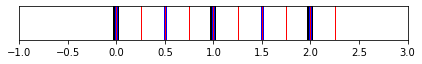

In [2]:
label_keys = {'measure': {'linewidth': 6, 'color': 'k'},
              'quarter': {'linewidth': 3, 'color': 'b'},
              'eighth': {'linewidth': 1, 'color': 'r'}}
        
fig, ax = LibFMP.B.plot_annotation_line(ann, label_keys=label_keys)
ax.set_xlim([-1,3]);

Next, we visualize the annotations horizontally aligned to a matrix. This mimics the situation, where the horizontal axis of the matrix has the semantics expressed by the annotations. 

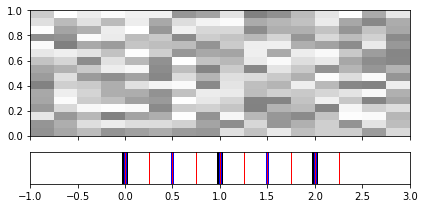

In [3]:
matrix = np.random.random((16, 16))

fig, ax = plt.subplots(2, 1, sharex=True, 
                       gridspec_kw={'height_ratios': [4, 1]}, figsize=(6, 3))

ax[0].imshow(matrix, cmap='gray_r', aspect='auto', extent=[-1, 3, 0, 1], alpha=0.5)
LibFMP.B.plot_annotation_line(ann, ax=ax[1], label_keys=label_keys, time_min=-1, time_max=3)

plt.tight_layout()

Similarly, the annotations can be visualized vertically aligned to the matrix. 

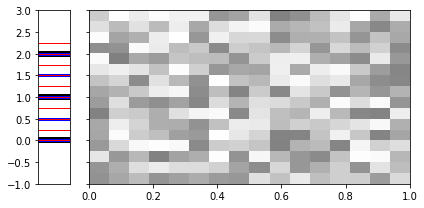

In [4]:
fig, ax = plt.subplots(1, 2, sharey=True, 
                       gridspec_kw={'width_ratios': [1, 10]}, figsize=(6, 3))

ax[1].imshow(matrix, cmap='gray_r', aspect='auto', extent=[0, 1, -1, 3], alpha=0.5)
LibFMP.B.plot_annotation_line(ann, ax=ax[0], label_keys=label_keys, 
                              direction='vertical', time_min=-1, time_max=3)

plt.tight_layout()

Similar to `LibFMP.B.plot_annotation_line`, there also is the function `LibFMP.B.plot_annotation_line_overlay`, which can be used to overlay a matrix with the annotations horizontally as well as vertically.

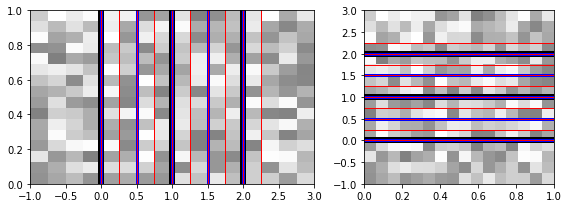

In [5]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 2]}, figsize=(8, 3))

ax[0].imshow(matrix, cmap='gray_r', aspect='auto', extent=[-1, 3, 0, 1], alpha=0.5)
LibFMP.B.plot_annotation_line_overlay(ann, ax=ax[0], label_keys=label_keys, time_min=-1, time_max=3)

ax[1].imshow(matrix, cmap='gray_r', aspect='auto', extent=[0, 1, -1, 3], alpha=0.5)
LibFMP.B.plot_annotation_line_overlay(ann, ax=ax[1], direction='vertical',
                              label_keys=label_keys, time_min=-1, time_max=3)
plt.tight_layout()

The function `LibFMP.B.plot_annotation_multiline` allows for plotting single-value annotations, where each label type is not only assigned to an individual plotting style, but also to a spatially separate row (or column).

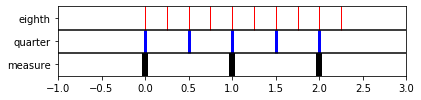

In [6]:
fig, ax = LibFMP.B.plot_annotation_multiline(ann, label_keys=label_keys, 
                                   sort_labels=['measure', 'quarter', 'eighth'])
ax.set_xlim([-1,3]);

The function `LibFMP.B.plot_annotation_multiline` can be horizontally or vertically aligned to a given matrix, as demonstrated in the next code cell. In this example, we also show how two plots may be placed next to each other using the function [`LibFMP.B.FloatingBox`](../B/B_PythonVisualization.html).


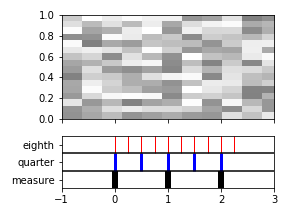
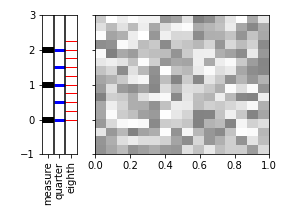

In [7]:
float_box = LibFMP.B.FloatingBox()

fig, ax = plt.subplots(2, 1, sharex=True, 
                       gridspec_kw={'height_ratios': [2, 1]}, figsize=(4, 3))
ax[0].imshow(matrix, cmap='gray_r', aspect='auto', 
             extent=[-1, 5, 0, 1], alpha=0.5)
ax[0].set_xlim([-1, 3])
LibFMP.B.plot_annotation_multiline(ann, ax=ax[1], label_keys=label_keys,
                                   sort_labels=['measure', 'quarter', 'eighth'],
                                   time_min=-1, time_max=3)
plt.tight_layout()
float_box.add_fig(fig)

fig, ax = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [2, 10]}, 
                       figsize=(4, 3))
ax[1].imshow(matrix, cmap='gray_r', aspect='auto', extent=[0, 1, -1, 3], alpha=0.5)
ax[1].set_ylim([-1, 5])
LibFMP.B.plot_annotation_multiline(ann, ax=ax[0], label_keys=label_keys, sort_labels=['measure', 'quarter', 'eighth'],
                     direction='vertical', time_min=-1, time_max=3)
plt.tight_layout()
float_box.add_fig(fig)

float_box.show()

## Segment Annotations

A second type of annotation we regularly encounter in the FMP notebooks are **segment annotations**, where each instance consists of two numerical values and a label. Typically, the two numerical values encode the start and end positions (given in seconds) of a time interval and the label assigns to this time interval a semantic category. For example, in [chord recognition](../C5/C5.html), the segments specify time intervals of a music recording and the labels specify musical [chords](../C5/C5S1_Chords.html) such as $\mathrm{C}$-major or a $\mathrm{E}^\flat$-minor chord. Or, in [music structure analysis](../C4/C4.html), the segments encode [musical parts](../C4/C4S1_MusicStructureGeneral.html), which are typically labeled by capital letters $A,B,C, \ldots$ in the order of their first occurrence. In the following code cell, we generate a toy example of such a segment annotation, which serves as our running example. 

In [8]:
ann = [(0, 8, 'A'), (8, 16, 'A'), (16, 24, 'B'), 
       (27, 33, 'C'), (33, 40, 'C'),  (40, 48, 'B')]
print('=== Dummy annotation ===')
print(ann)

# Convert to DataFrame and CSV format (as used for the FMP notebooks)
ann_df = pd.DataFrame(ann, columns=['start', 'end', 'label'])
ann_csv = ann_df.to_csv(sep=';', index=False, quoting=2)
print('\n=== Dummy annotation in CSV format ===')
print(ann_csv)
print('=== Dummy annotation stored as DataFrame and rendered as HTML ===')
ipd.display(ipd.HTML(ann_df.to_html()))

# Store and load annotation file 
#fn_out = os.path.join('..', 'output', 'B', 'FMP_annotation_segment_dummy.csv')
#ann_df.to_csv(fn_out, sep=';', index=False, quoting=2)
#ann_df = pd.read_csv(fn_out, sep=';')
#ann = [(start, end, label) for i, (start, end, label) in df.iterrows()]

=== Dummy annotation ===
[(0, 8, 'A'), (8, 16, 'A'), (16, 24, 'B'), (27, 33, 'C'), (33, 40, 'C'), (40, 48, 'B')]

=== Dummy annotation in CSV format ===
"start";"end";"label"
0;8;"A"
8;16;"A"
16;24;"B"
27;33;"C"
33;40;"C"
40;48;"B"

=== Dummy annotation stored as DataFrame and rendered as HTML ===


,start,end,label
0,0,8,A
1,8,16,A
2,16,24,B
3,27,33,C
4,33,40,C
5,40,48,B


The function `LibFMP.B.plot_segments` allows for plotting segment annotations, where each label type is assigned to an individual color. In the following code cell, we visualize the segment annotations with default colors and colors that are defined via a dictionary.

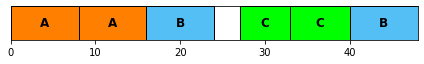

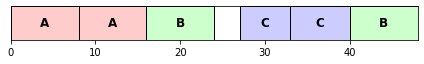

In [9]:
fig, ax = LibFMP.B.plot_segments(ann)

color_ann = {'A': [1, 0, 0, 0.2], 'B': [0, 1, 0, 0.2], 
             'C': [0, 0, 1, 0.2], '': [1, 1, 1, 0.2]}

fig, ax = LibFMP.B.plot_segments(ann, colors = color_ann)

Next, we visualize the segment annotations horizontally aligned to a matrix, once in vertical direction and once in horizontal direction.


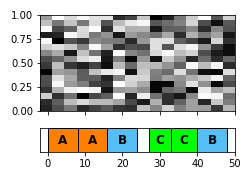
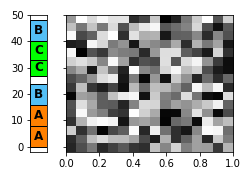

In [10]:
float_box = LibFMP.B.FloatingBox()

# Horizontal alignment
fig, ax = plt.subplots(2, 1, sharex=True, 
                       gridspec_kw={'height_ratios': [4, 1]}, figsize=(3.5, 2.5))
ax[0].imshow(matrix, cmap='gray_r', aspect='auto', extent=[-2, 50, 0, 1])
LibFMP.B.plot_segments(ann, ax=ax[1], time_min=-2, time_max=50)
plt.tight_layout()
float_box.add_fig(fig)

# Vertical alignment
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(3.5, 2.5),
                       gridspec_kw={'width_ratios': [1, 10]})
ax[1].imshow(matrix, cmap='gray_r', aspect='auto', extent=[0, 1, -2, 50])
LibFMP.B.plot_segments(ann, ax=ax[0], direction='vertical', time_min=-2, time_max=50)
plt.tight_layout()
float_box.add_fig(fig)

float_box.show()

One may also apply the alignment in both directions.

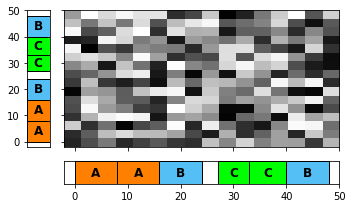

In [11]:
fig, ax = plt.subplots(2, 2,  figsize=(5, 3), sharex='col', sharey='row',
                       gridspec_kw={'height_ratios': [6, 1], 'width_ratios': [1, 12]})
ax[0, 1].imshow(matrix, cmap='gray_r', aspect='auto', extent=[-2, 50, -2, 50])
LibFMP.B.plot_segments(ann, ax=ax[1, 1], time_min=-2, time_max=50)
LibFMP.B.plot_segments(ann, ax=ax[0, 0], direction='vertical', time_min=-2, time_max=50)
ax[1, 0].axis('off')
plt.tight_layout()

The function `LibFMP.B.plot_segments_overlay` is provided for overlaying segment annotations with image plots. Among others, one can set a parameter (`alpha`) for controlling the transparency of the annotations' visualization and parameters (`print_labels`, `label_ticks`) for removing and placing labels. The next code cell shows some settings.

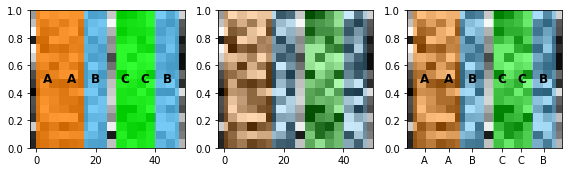

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(8, 2.5))
ax[0].imshow(matrix, cmap='gray_r', aspect='auto', extent=[-2, 50, 0, 1])
LibFMP.B.plot_segments_overlay(ann, ax=ax[0], time_min=-2, time_max=50, alpha=0.8)

ax[1].imshow(matrix, cmap='gray_r', aspect='auto', extent=[-2, 50, 0, 1])
LibFMP.B.plot_segments_overlay(ann, ax=ax[1], time_min=-2, time_max=50,
                               print_labels=False, alpha=0.3)

ax[2].imshow(matrix, cmap='gray_r', aspect='auto', extent=[-2, 50, 0, 1])
LibFMP.B.plot_segments_overlay(ann, ax=ax[2], time_min=-2, time_max=50,
                               label_ticks=True, alpha=0.5)
plt.tight_layout()

One may also overlay several horizontally and vertically aligned annotations. This is demonstrated by the next example.

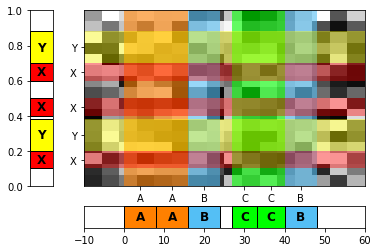

In [13]:
ann_v = [(0.1, 0.2, 'X'), (0.2, 0.38, 'Y'), (0.4, 0.5, 'X'), (0.6, 0.7, 'X'), (0.7, 0.88, 'Y')]
color_ann_v = {'X': [1, 0, 0, 1], 'Y': [1, 1, 0, 1], '': [1, 1, 1, 1]}

fig, ax = plt.subplots(2, 2, figsize=(6, 4),
                       gridspec_kw={'height_ratios': [8, 1], 'width_ratios': [1, 12]})
ax[0,1].imshow(matrix, cmap='gray_r', aspect='auto', extent=[-10, 60, 0, 1])
LibFMP.B.plot_segments_overlay(ann, ax=ax[0, 1], time_min=-10, time_max=60, 
                               label_ticks=True, print_labels=False, alpha=0.6)
LibFMP.B.plot_segments_overlay(ann_v, colors=color_ann_v, ax=ax[0, 1], time_min=0, time_max=1,  
                               direction='vertical', label_ticks=True, 
                               print_labels=False, alpha=0.4)
LibFMP.B.plot_segments(ann, ax=ax[1, 1], time_min=-10, time_max=60)
LibFMP.B.plot_segments(ann_v, ax=ax[0, 0], colors=color_ann_v, 
                       direction='vertical', time_min=0, time_max=1)
ax[1,0].axis('off');

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a> and <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div>

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>